In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn import cluster
from sklearn import metrics
from scipy.spatial import distance
from scipy import stats
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import gapstat as gs
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Part A

## Question 1: Group Info

Group Name: Plum

Group Member: Eric Grant

<p style="page-break-after:always;"></p>

## Question 2: K-Means Clustering

### (a)

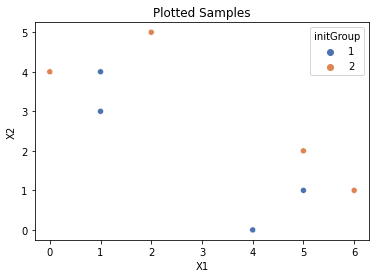

In [2]:
points = pd.DataFrame({
    'sample':    [1,2,3,4,5,6,7,8],
    'x1':        [0,1,1,2,4,5,5,6],
    'x2':        [4,3,4,5,0,1,2,1],
    'initGroup': [2,1,1,2,1,1,2,2],
    'group': [2,1,1,2,1,1,2,2]
})
plot = sb.scatterplot(data=points, x="x1", y="x2", hue="initGroup", palette="deep")
plot.set(xlabel="X1", ylabel="X2")
plt.title("Plotted Samples")
plt.show()

### (b + c)

In [3]:
group1 = points[points["initGroup"] == 1]
group2 = points[points["initGroup"] == 2]

centroid1 = ((sum(group1["x1"])/len(group1)), (sum(group1["x2"])/len(group1)))
centroid2 = ((sum(group2["x1"])/len(group2)), (sum(group2["x2"])/len(group2)))

centroids = pd.DataFrame({
    'group': ["Group1","Group2"],
    'x1': [centroid1[0], centroid2[0]],
    'x2': [centroid1[1], centroid2[1]]
})

for index, row in points.iterrows():
    cord = np.array((row[1],row[2]))
    distance1 = np.linalg.norm(cord - centroid1)
    distance2 = np.linalg.norm(cord - centroid2)
    if (distance1 < distance2):
        points.at[index,"group"] = 1
    elif (distance1 > distance2):
        points.at[index,"group"] = 2

print("Iteration: 1")
display(centroids)
display(points[["sample","group"]])

Iteration: 1


,group,x1,x2
0,Group1,2.75,2.0
1,Group2,3.25,3.0


,sample,group
0,1,2
1,2,1
2,3,2
3,4,2
4,5,1
5,6,1
6,7,2
7,8,2


### (d)

In [4]:
iteration = 2
while True:
    clone = centroids
    group1 = points[points["group"] == 1]
    group2 = points[points["group"] == 2]
    centroid1 = ((sum(group1["x1"])/len(group1)), (sum(group1["x2"])/len(group1)))
    centroid2 = ((sum(group2["x1"])/len(group2)), (sum(group2["x2"])/len(group2)))
    centroids = pd.DataFrame({'group': ["Group1","Group2"],'x1': [centroid1[0], centroid2[0]],'x2': [centroid1[1], centroid2[1]]})

    for index, row in points.iterrows():
        cord = np.array((row[1],row[2]))
        distance1 = np.linalg.norm(cord - centroid1)
        distance2 = np.linalg.norm(cord - centroid2)
        if (distance1 < distance2):
            points.at[index,"group"] = 1
        elif (distance1 > distance2):
            points.at[index,"group"] = 2

    print("Iteration:", iteration)
    display(centroids)
    display(points[["sample","group"]])
    print()
    iteration += 1

    if (centroids.equals(clone)):
        break

Iteration: 2


,group,x1,x2
0,Group1,3.333333,1.333333
1,Group2,2.800000,3.200000


,sample,group
0,1,2
1,2,2
2,3,2
3,4,2
4,5,1
5,6,1
6,7,1
7,8,1



Iteration: 3


,group,x1,x2
0,Group1,5.0,1.0
1,Group2,1.0,4.0


,sample,group
0,1,2
1,2,2
2,3,2
3,4,2
4,5,1
5,6,1
6,7,1
7,8,1



Iteration: 4


,group,x1,x2
0,Group1,5.0,1.0
1,Group2,1.0,4.0


,sample,group
0,1,2
1,2,2
2,3,2
3,4,2
4,5,1
5,6,1
6,7,1
7,8,1


### (e)

Green points are centroids

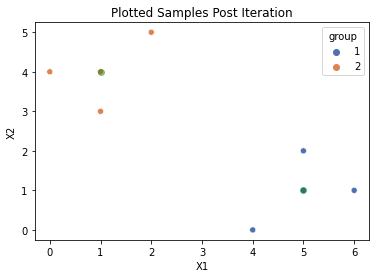

In [5]:
plot = sb.scatterplot(data=points, x="x1", y="x2", hue="group", palette="deep")
plot.set(xlabel="X1", ylabel="X2")
plt.title("Plotted Samples Post Iteration")
plt.scatter(x=5, y=1, color='g', alpha=0.4)
plt.scatter(x=1, y=4, color='g', alpha=0.4)
plt.show()

<p style="page-break-after:always;"></p>

## Question 3: Hierarchical Clustering

Original Data

|     | 1   | 2  | 3   | 4   | 5 |
| --- | :----: | :----: | :----: | :----: | :----: |
| 1   |  0  | -   | -   | -   | - |
| 2   | 0.3 | 0   | -   | -   | - |
| 3   | 0.4 | 0.5 | 0   | -   | - |
| 4   | 0.7 | 0.8 | 0.45| 0   | - |
| 5   | 0.6 | 0.2 | 0.4 | 0.35| 0 |

### (a)

Step 1. Combine 2 and 5

|     | 1   | 25  | 3   | 4   |
| --- | :----: | :----: | :----: | :----: |
| 1   |  0  | -   | -   | -   |
| 25  | 0.6 | 0   | -   | -   |
| 3   | 0.4 | 0.5 | 0   | -   |
| 4   | 0.7 | 0.8 | 0.45| 0   |

Step 2. Combine 1 and 3

|     | 13  | 25  | 4   |
| --- | :----: | :----: | :----: |
| 13  |  0  | -   | -   |
| 25  | 0.6 | 0   | -   |
| 4   | 0.7 | 0.8 | 0   |

Step 3. Combine 13 and 25

|      | 1325 | 4   |
| --- | :----: | :----: |
| 1325 |  0   | -   |
| 4    | 0.8  | 0   |

Step 4. Combine 1325 and 4

|       | 13254 |
| --- | :----:  |
| 13254 |  0    |

![Dendrogram01](./dendrogram01.png)

### (b)

Step 1. Combine 2 and 5

|     | 1   | 25  | 3   | 4   |
| --- | :----: | :----: | :----: | :----: |
| 1   |  0  | -   | -   | -   |
| 25  | 0.3 | 0   | -   | -   |
| 3   | 0.4 | 0.4 | 0   | -   |
| 4   | 0.7 | 0.35 | 0.45| 0   |

Step 2. Combine 1 and 25

|     | 125  | 3  | 4   |
| --- | :----: | :----: | :----: |
| 125 |  0  | -   | -   |
| 3   | 0.4 | 0   | -   |
| 4   | 0.35 | 0.45 | 0   |

Step 3. Combine 125 and 4

|      | 1254 | 3   |
| --- | :----: | :----: |
| 1254 |  0   | -   |
| 3    | 0.4  | 0   |

Step 4. Combine 1254 and 3

|       | 12543 |
| --- | :----:  |
| 12543 |  0    |

![Dendrogram02](./dendrogram02.png)

### (c)

Complete Linkage Clusters:

(2, 5), (1, 3), (4)

![Dendrogram01_cut](./dendrogram01_cut.png)

Single Linkage Clusters:

(2, 5, 1), (4), (3)

![Dendrogram02_cut](./dendrogram02_cut.png)

<p style="page-break-after:always;"></p>

# Part B

## Question 4: Normalized Values

In [6]:

nums = np.array([20,30,40,60,120]).reshape(-1,1)

scaler = MinMaxScaler()
ns1 = scaler.fit_transform(nums)
scaler = MinMaxScaler([-1,1])
ns2 = scaler.fit_transform(nums)
scaler = StandardScaler()
ns3 = scaler.fit_transform(nums)

normed = pd.DataFrame({
    "orig": [20,30,40,60,120],
    "minMax": [ns1[0][0],ns1[1][0],ns1[2][0],ns1[3][0],ns1[4][0]],
    "minMaxNeg": [ns2[0][0],ns2[1][0],ns2[2][0],ns2[3][0],ns2[4][0]],
    "z-score": [ns3[0][0],ns3[1][0],ns3[2][0],ns3[3][0],ns3[4][0]] 
})

print("Normalized vectors")
display(normed)


Normalized vectors


,orig,minMax,minMaxNeg,z-score
0,20,0.0,-1.0,-0.956325
1,30,0.1,-0.8,-0.675053
2,40,0.2,-0.6,-0.393781
3,60,0.4,-0.2,0.168763
4,120,1.0,1.0,1.856395


<p style="page-break-after:always;"></p>

## Question 5: Distances

### (a)

In [7]:
samples = pd.DataFrame({
    "A": [1.4,1.8,1.3,0.9,1.5],
    "B": [1.3,1.1,1.2,3.3,2.1],
    "C": [2.9,3.2,2.9,3.1,3.3]
})

distances = pd.DataFrame({
    "sample": ["x1","x2","x3","x4","x5"],
    "man": [0.,0.,0.,0.,0.],
    "euc": [0.,0.,0.,0.,0.],
    "min": [0.,0.,0.,0.,0.],
    "sup": [0.,0.,0.,0.,0.],
    "cos": [0.,0.,0.,0.,0.]
})

newP = [1.25,1.74,3.01]

for index, row in samples.iterrows():
    distances.at[index,"man"] = abs(newP[0]-row[0]) + abs(newP[1]-row[1]) + abs(newP[2]-row[2])
    distances.at[index,"euc"] = np.linalg.norm(newP-row)
    distances.at[index,"min"] = distance.minkowski(newP, row, 3)
    distances.at[index,"sup"] = distance.chebyshev(newP, row)
    distances.at[index,"cos"] = distance.cosine(newP, row)

print("Distances from new point to data points")
display(distances)

Distances from new point to data points


,sample,man,euc,min,sup,cos
0,x1,0.70,0.477703,0.447958,0.44,0.006975
1,x2,1.38,0.864986,0.757918,0.64,0.025745
2,x3,0.70,0.553353,0.541659,0.54,0.008671
3,x4,2.00,1.601312,1.565950,1.56,0.050270
4,x5,0.90,0.525547,0.442544,0.36,0.001018


### (b)

In [8]:
arrSamples = samples.values
arrNewP = np.array(newP).reshape(1,-1)

scaler = MinMaxScaler()
scaler.fit(arrSamples)

normSamples = scaler.transform(arrSamples)
normSamples = pd.DataFrame(data=normSamples)

normNewP = scaler.transform(arrNewP)[0]

normDistances = pd.DataFrame({
    "sample": ["x1","x2","x3","x4","x5"],
    "euc": [0.,0.,0.,0.,0.]
})
for index, row in normSamples.iterrows():
    normDistances.at[index,"euc"] = np.linalg.norm(normNewP-row)

print("Euclidean Distances with Normalization")
display(normDistances)

Euclidean Distances with Normalization


,sample,euc
0,x1,0.378686
1,x2,0.826868
2,x3,0.372773
3,x4,0.839446
4,x5,0.793450


<p style="page-break-after:always;"></p>

## Question 6: Pokemon Data & Grouping

### (a)

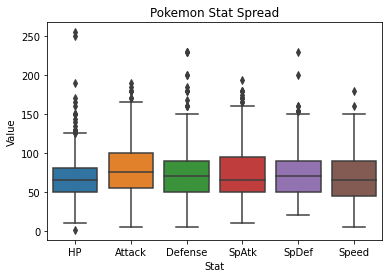

In [9]:
pokemon = pd.read_csv("Pokemon.csv", sep=",", engine="python")
stats = ["HP","Attack","Defense","SpAtk","SpDef","Speed"]
plot = sb.boxplot(x="variable", y="value", data=pd.melt(pokemon[stats]))
plot.set(xlabel="Stat", ylabel="Value")
plot.set_title("Pokemon Stat Spread")
plt.show()

### (b)

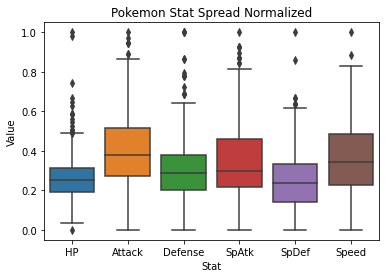

In [10]:
scaler = MinMaxScaler()
scaler.fit(pokemon[stats])
pokemon[stats] = scaler.transform(pokemon[stats])

plot = sb.boxplot(x="variable", y="value", data=pd.melt(pokemon[stats]))
plot.set(xlabel="Stat", ylabel="Value")
plot.set_title("Pokemon Stat Spread Normalized")
plt.show()


### (c)

In [11]:
kClusters = []
for n in range(3,9):
    kmeans = cluster.KMeans(n_clusters=n).fit(pokemon[stats])
    kClusters.append(kmeans.cluster_centers_)

### (d)

In [12]:
k, labels = gs.gapstat(pokemon[stats])
print("Optimal number of clusters:",k)

Optimal number of clusters: 4


### (e)

In [13]:
statCentroids = pd.DataFrame(data=kClusters[k-3], columns=stats)
display(statCentroids)

,HP,Attack,Defense,SpAtk,SpDef,Speed
0,0.344436,0.630041,0.380413,0.608407,0.361188,0.543919
1,0.305436,0.498948,0.454105,0.297937,0.308611,0.287938
2,0.203529,0.264016,0.211771,0.207876,0.145214,0.250141
3,0.288217,0.388237,0.281508,0.412852,0.276757,0.468848


### (f)

In [14]:
orig = scaler.inverse_transform(statCentroids[stats])
statCentroidsOrig = pd.DataFrame(data=orig, columns=stats)
display(statCentroidsOrig)

,HP,Attack,Defense,SpAtk,SpDef,Speed
0,88.486726,121.557522,90.592920,121.946903,95.849558,100.185841
1,78.580838,97.305389,107.173653,64.820359,84.808383,55.389222
2,52.696246,53.843003,52.648464,48.249147,50.494881,48.774744
3,74.207048,76.823789,68.339207,85.964758,78.118943,87.048458


### (g)

In [20]:
fig = go.Figure()
for n in range(0,k):   
    gName = "Group" + str(n+1) 
    fig.add_trace(go.Scatterpolar(
        r=statCentroidsOrig.iloc[n],
        theta=stats,
        fill="toself",
        name=gName
    ))
fig.show()

![statSpread](./statSpread.png)

<p style="page-break-after:always;"></p>

## Question 7: Music Data

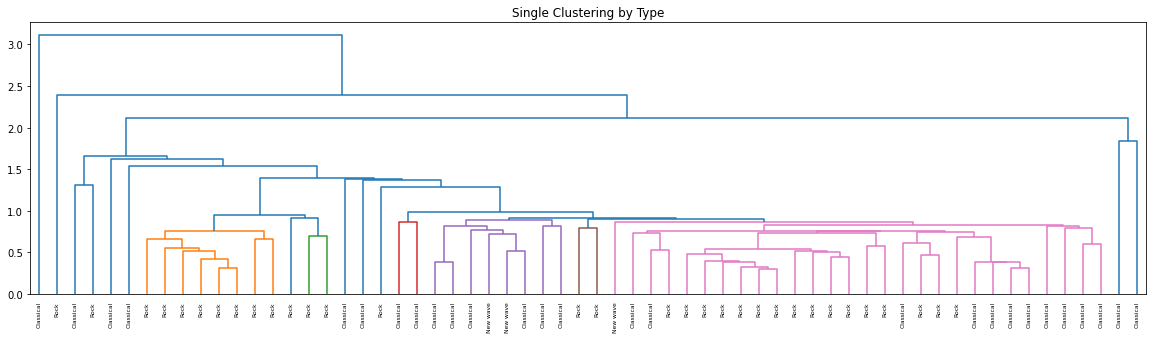

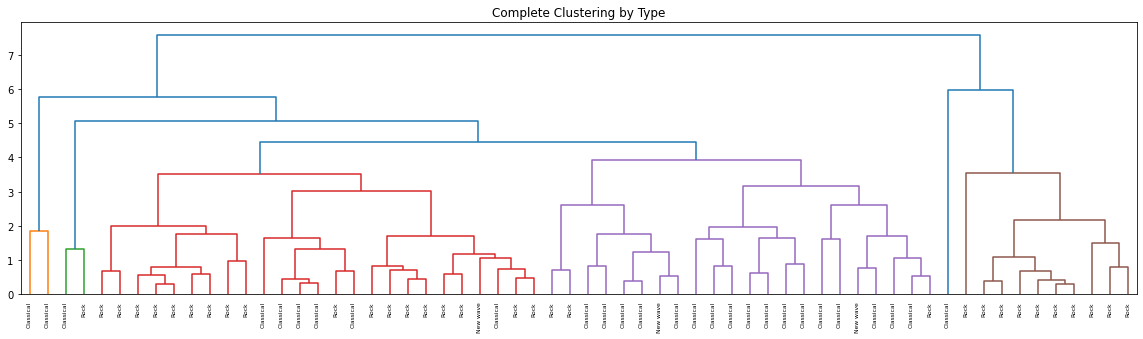

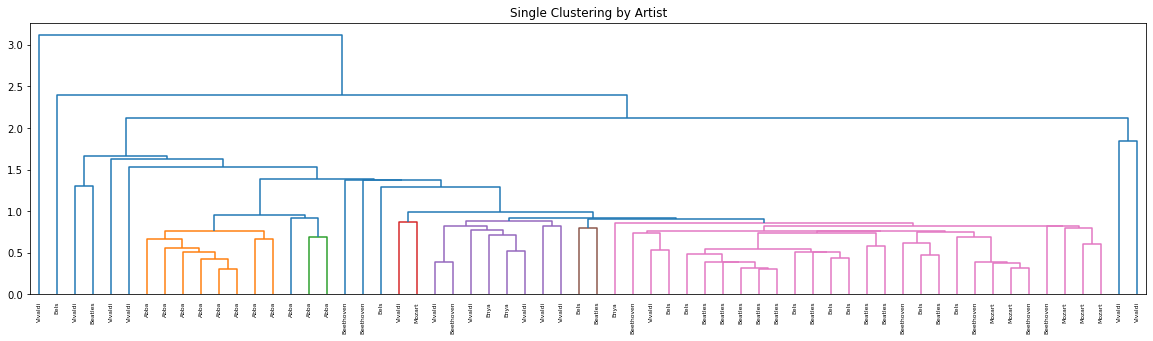

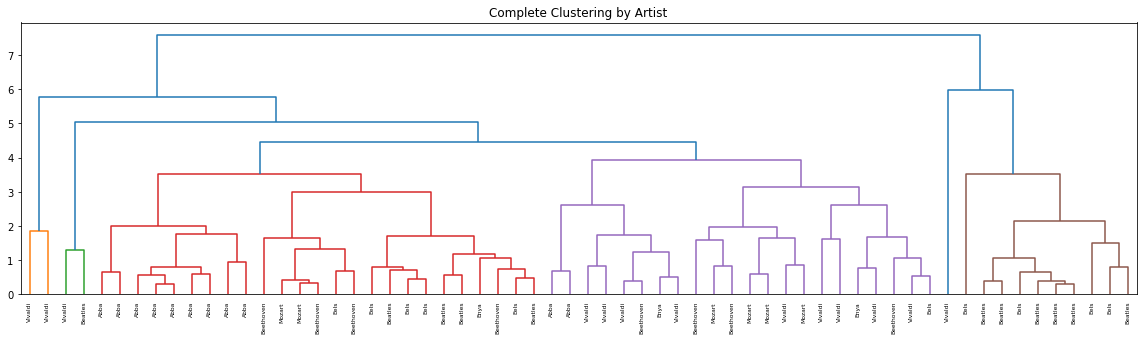

In [16]:
music = pd.read_csv("music2.csv", sep=",", engine="python")
vals = ["LVar","LAve","LMax","LFEner","LFreq"]
scaler = StandardScaler()
scaler.fit(music[vals])
music[vals] = scaler.transform(music[vals])

single = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single")
single = single.fit(music[vals])
y1 = single.fit_predict(music[vals])
Z1 = hierarchy.linkage(music[vals], 'single')

complete = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete")
complete = complete.fit(music[vals])
y2 = complete.fit_predict(music[vals])
Z2 = hierarchy.linkage(music[vals], 'complete')

plt.figure(figsize=(20, 5))
plt.title("Single Clustering by Type")
dn = hierarchy.dendrogram(Z1, labels=music["Type"].to_numpy(), color_threshold=.9)
plt.show()

plt.figure(figsize=(20, 5))
plt.title("Complete Clustering by Type")
dn = hierarchy.dendrogram(Z2, labels=music["Type"].to_numpy(), color_threshold=4)

plt.figure(figsize=(20, 5))
plt.title("Single Clustering by Artist")
dn = hierarchy.dendrogram(Z1, labels=music["Artist"].to_numpy(), color_threshold=.9)
plt.show()

plt.figure(figsize=(20, 5))
plt.title("Complete Clustering by Artist")
dn = hierarchy.dendrogram(Z2, labels=music["Artist"].to_numpy(), color_threshold=4)
plt.show()

I believe that using complete clustering and labeling using the artists gives the best results.

In this case each artist has most of their songs close together with a few outliers that are typically also group near eachother.

This shows artists general vibe and also shows how some songs or group of songs stand out from their usual.